In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("D:/loan_old.csv")
data2=pd.read_csv("D:/loan_new.csv")

In [3]:
print("Num of Missing Values each feature:\n")
print(data.isnull().sum())
print("\n")
NewData = data.dropna()
print("Data after deleting missing values:\n")
print(NewData)


Num of Missing Values each feature:

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64


Data after deleting missing values:

      Loan_ID  Gender Married Dependents     Education  Income  \
1    LP001003    Male     Yes          1      Graduate    4583   
2    LP001005    Male     Yes          0      Graduate    3000   
3    LP001006    Male     Yes          0  Not Graduate    2583   
4    LP001008    Male      No          0      Graduate    6000   
5    LP001011    Male     Yes          2      Graduate    5417   
..        ...     ...     ...        ...           ...     ...   
609  LP002978  Female      No          0      Graduate    2900   
610  LP002979    Male     Yes         3+      Graduate    4106   
611  LP002983    

In [4]:
print("\nData Types:\n")
print(NewData.dtypes)


Data Types:

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Income                  int64
Coapplicant_Income    float64
Loan_Tenor            float64
Credit_History        float64
Property_Area          object
Max_Loan_Amount       float64
Loan_Status            object
dtype: object


Numerical Features Scale:

Income                4469.976643
Coapplicant_Income    2102.196620
Loan_Tenor              23.139902
Credit_History           0.351685
Max_Loan_Amount        157.632279
dtype: float64


Numerical Features description:

             Income  Coapplicant_Income  Loan_Tenor  Credit_History  \
count    513.000000          513.000000  513.000000      513.000000   
mean    5030.730994         1486.627524  137.660819        0.855750   
std     4469.976643         2102.196620   23.139902        0.351685   
min      150.000000            0.000000   36.000000        0.000000   
25%     2889.000000            0.000000  144.000000        1.000000   
50%     3800.000000         1126.000000  144.000000        1.000000   
75%     5703.000000         2250.000000  144.000000        1.000000   
max    63337.000000        20000.000000  192.000000        1.000000   

       Max_Loan_Amount  
count       513.000000  
mean        227.414405  
std         157.632279  
min          

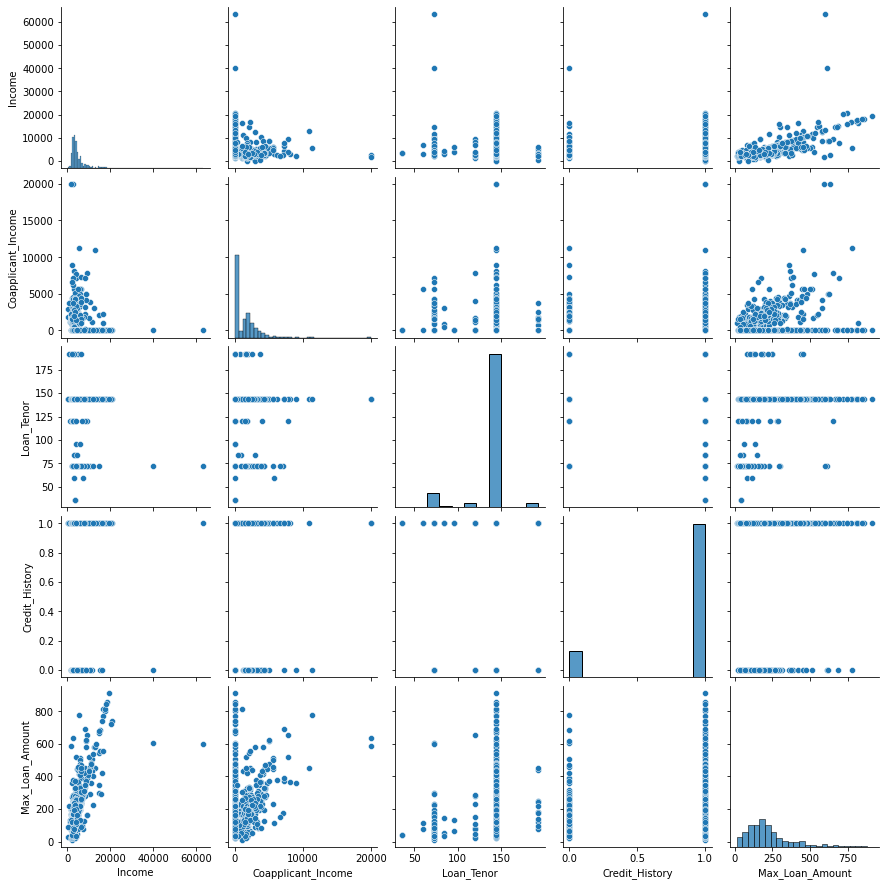

In [5]:
num_features = NewData.select_dtypes(include=[np.number])
num_features_scale = num_features.std()
scaled_features_description = NewData[num_features.columns].describe()
print("Numerical Features Scale:\n")
print(num_features_scale)
print("\n")
print("Numerical Features description:\n")
print(scaled_features_description)
sns.pairplot(NewData[num_features.columns])
plt.show()

In [6]:
X= NewData.drop(['Max_Loan_Amount', 'Loan_Status','Loan_ID'], axis=1)
y_amount = NewData['Max_Loan_Amount']
y_status = NewData['Loan_Status']
#Linear
print("\n Features:\n")
print(X.head(),"\n")
print("\nTarget Amount:\n")
print(y_amount.head(),"\n")
#logestic
print("\n Target Status:\n")
print(y_status.head())


 Features:

  Gender Married Dependents     Education  Income  Coapplicant_Income  \
1   Male     Yes          1      Graduate    4583              1508.0   
2   Male     Yes          0      Graduate    3000                 0.0   
3   Male     Yes          0  Not Graduate    2583              2358.0   
4   Male      No          0      Graduate    6000                 0.0   
5   Male     Yes          2      Graduate    5417              4196.0   

   Loan_Tenor  Credit_History Property_Area  
1       144.0             1.0         Rural  
2       144.0             1.0         Urban  
3       144.0             1.0         Urban  
4       144.0             1.0         Urban  
5       144.0             1.0         Urban   


Target Amount:

1    236.99
2     81.20
3    179.03
4    232.40
5    414.50
Name: Max_Loan_Amount, dtype: float64 


 Target Status:

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object


In [7]:
X_train,X_test, y_amount_train, y_amount_test, y_status_train, y_status_test = train_test_split(X, y_amount, y_status, test_size=0.1, random_state=42,shuffle=True)
print("X Train:" )
print(X_train,"\n")
print("X Test:")
print(X_test,"\n")
print("y_amount_Train:")
print(y_amount_train,"\n")
print("y_amount_Test:")
print(y_amount_test,"\n")
print("y_status_Train:")
print(y_status_train,"\n")
print("y_status_Test:")
print(y_status_test,"\n")


X Train:
    Gender Married Dependents     Education  Income  Coapplicant_Income  \
578   Male     Yes          1      Graduate    1782              2232.0   
75    Male      No          0      Graduate    3750                 0.0   
546   Male      No          0  Not Graduate    3358                 0.0   
84    Male     Yes          1      Graduate    3988                 0.0   
3     Male     Yes          0  Not Graduate    2583              2358.0   
..     ...     ...        ...           ...     ...                 ...   
132   Male      No          0      Graduate    2718                 0.0   
325   Male     Yes          1      Graduate    8666              4983.0   
417   Male     Yes          2      Graduate    1600             20000.0   
523   Male     Yes          2      Graduate    7948              7166.0   
124   Male     Yes          0  Not Graduate    4300              2014.0   

     Loan_Tenor  Credit_History Property_Area  
578       144.0             1.0         Ru

In [11]:
label_encoder = LabelEncoder()
for column in ['Gender','Married','Education','Dependents','Property_Area','Credit_History' ]:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

scaler = StandardScaler()
X_train[['Income','Coapplicant_Income','Loan_Tenor']]=scaler.fit_transform(X_train[['Income','Coapplicant_Income','Loan_Tenor']])
X_test[['Income','Coapplicant_Income','Loan_Tenor']]=scaler.fit_transform(X_test[['Income','Coapplicant_Income','Loan_Tenor']])

print("Encoded Standerlized Training Features (X_train):\n", X_train.head())
print("\nEncoded Standerlized Testing Features (X_test):\n", X_test.head())

Encoded Standerlized Training Features (X_train):
      Gender  Married  Dependents  Education    Income  Coapplicant_Income  \
578       1        1           1          0 -0.715604            0.358980   
75        1        0           0          0 -0.292244           -0.692407   
546       1        0           0          1 -0.376572           -0.692407   
84        1        1           1          0 -0.241045           -0.692407   
3         1        1           0          1 -0.543291            0.418333   

     Loan_Tenor  Credit_History  Property_Area  
578    0.293809               1              0  
75     2.401913               1              2  
546   -4.449427               1              1  
84    -1.814296               1              2  
3      0.293809               1              2  

Encoded Standerlized Testing Features (X_test):
      Gender  Married  Dependents  Education    Income  Coapplicant_Income  \
366       1        0           0          0 -0.855404           -

In [12]:
encoder = LabelEncoder()
y_status_train = encoder.fit_transform(y_status_train)
y_status_test = encoder.fit_transform(y_status_test)
print("Encoded numrical Target (Y_Status_Train):\n", y_status_train,"\n")
print("Encoded Standerlized Testing Features (Y_Status_test):\n", y_status_test)

Encoded numrical Target (Y_Status_Train):
 [1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1
 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1] 

Encoded Standerlize

In [13]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_amount_train)
y_amount_train_pred = linear_reg_model.predict(X_train)
# Evaluate the model using R2 score on the training set
r2_train = r2_score(y_amount_train, y_amount_train_pred)
print(f"R2 Score on Training Set: {r2_train}")

R2 Score on Training Set: 0.7267429169396329


In [18]:
# fit logistic regression 
import numpy as np
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize theta array and alpha value and setting max iterations
theta = np.zeros(X_train.shape[1])
alpha = 0.01
max_iterations = 1000
# Perform gradient descent
m = len(y_status_train)
for iteration in range(max_iterations):
    z = np.dot(X_train, theta)
    h = sigmoid(z)

    gradient = np.dot(X_train.T, (h - y_status_train)) / m
    theta -= alpha * gradient

In [19]:
# Make predictions on the test set
y_status_pred = sigmoid(np.dot(X_test, theta))
y_pred_class = np.where(y_status_pred >= 0.5, 1, 0)
# Calculate accuracy for logistic model
accuracy = np.mean(y_pred_class == y_status_test)
print("Accuracy:", accuracy) 
print("Accuracy in percentage :", accuracy*100)

Accuracy: 0.7884615384615384
Accuracy in percentage : 78.84615384615384


In [20]:
#  accuracy function
def accuracy(X,Y):
 return (np.sum(X==Y)/Y.size)*100
# test accuracy function  on data 
accuracy(y_pred_class,y_status_test)

78.84615384615384

In [21]:
print("Num of Missing Values each feature:\n")
print(data2.isnull().sum())
print("\n")
newdata2 = data2.dropna()
print("Data after deleting missing values:\n")
print(newdata2)

Num of Missing Values each feature:

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor             7
Credit_History        29
Property_Area          0
dtype: int64


Data after deleting missing values:

      Loan_ID Gender Married Dependents     Education  Income  \
0    LP001015   Male     Yes          0      Graduate    5720   
1    LP001022   Male     Yes          1      Graduate    3076   
2    LP001031   Male     Yes          2      Graduate    5000   
4    LP001051   Male      No          0  Not Graduate    3276   
5    LP001054   Male     Yes          0  Not Graduate    2165   
..        ...    ...     ...        ...           ...     ...   
361  LP002969   Male     Yes          1      Graduate    2269   
362  LP002971   Male     Yes         3+  Not Graduate    4009   
363  LP002975   Male     Yes          0      Graduate    4158   
365  LP0029


Data Types:

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Income                  int64
Coapplicant_Income      int64
Loan_Tenor            float64
Credit_History        float64
Property_Area          object
dtype: object
Numerical Features Scale:

Income                4744.266171
Coapplicant_Income    2336.327755
Loan_Tenor              23.023344
Credit_History           0.380710
dtype: float64


Numerical Features description:

             Income  Coapplicant_Income  Loan_Tenor  Credit_History
count    314.000000          314.000000  314.000000      314.000000
mean    4732.009554         1531.076433  138.216561        0.824841
std     4744.266171         2336.327755   23.023344        0.380710
min        0.000000            0.000000   12.000000        0.000000
25%     2860.500000            0.000000  144.000000        1.000000
50%     3834.000000          853.500000  144.000000

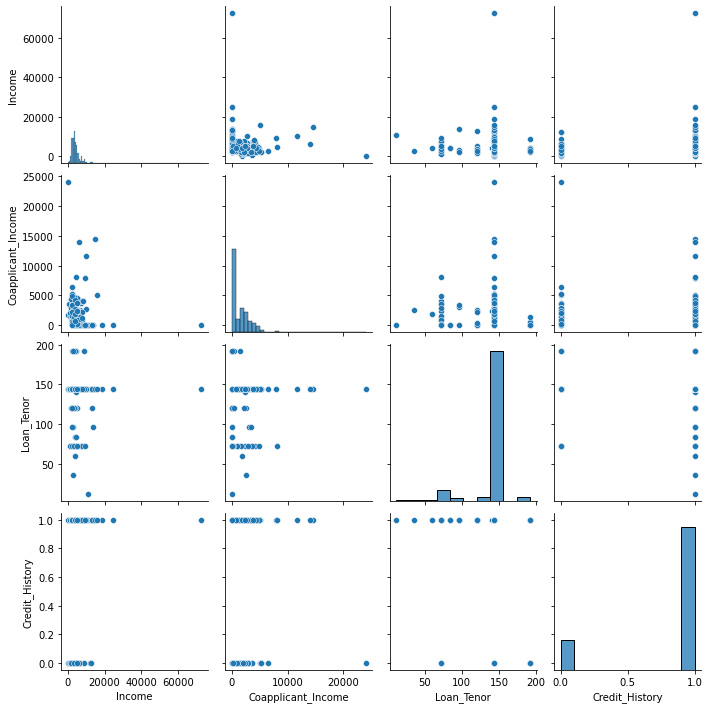

In [22]:
print("\nData Types:\n")
print(newdata2.dtypes)
num_features = newdata2.select_dtypes(include=[np.number])
num_features_scale = num_features.std()
scaled_features_description = newdata2[num_features.columns].describe()
print("Numerical Features Scale:\n")
print(num_features_scale)
print("\n")
print("Numerical Features description:\n")
print(scaled_features_description)
sns.pairplot(newdata2[num_features.columns])
plt.show()

In [23]:
#ii
X = newdata2.drop('Loan_ID', axis=1) 
label_encoder = LabelEncoder()
for column in ['Gender','Married','Education','Dependents','Property_Area','Credit_History' ]:
    X[column] = label_encoder.fit_transform(X[column])
  
#vi
scaler = StandardScaler()
X[['Income','Coapplicant_Income','Loan_Tenor']]=scaler.fit_transform(X[['Income','Coapplicant_Income','Loan_Tenor']])

#Display the preprocessed data
print("Preprocessed Data:")
print(X.head())

Preprocessed Data:
   Gender  Married  Dependents  Education    Income  Coapplicant_Income  \
0       1        1           0          0  0.208582           -0.656381   
1       1        1           1          0 -0.349612           -0.013323   
2       1        1           2          0  0.056577            0.115289   
4       1        0           0          1 -0.307389           -0.656381   
5       1        1           0          1 -0.541940            0.810649   

   Loan_Tenor  Credit_History  Property_Area  
0      0.2516               1              2  
1      0.2516               1              2  
2      0.2516               1              2  
4      0.2516               1              2  
5      0.2516               1              2  


In [24]:
maxAmountPredicted = linear_reg_model.predict(X)
print("Max Amount:")
print(maxAmountPredicted)
loanPredicted = sigmoid(np.dot(X, theta))
lpClass = np.where(loanPredicted >= 0.5, 1, 0)
print("Loan Status Predicted:")
print(lpClass)

Max Amount:
[ 2.20631723e+02  1.97669566e+02  2.61658134e+02  1.37375794e+02
  2.07838333e+02  1.11796459e+02  1.75167881e+02  3.32052081e+02
  1.90686462e+02  1.32480355e+02  1.83181815e+02  4.01421874e+02
  1.87238919e+02  2.20710166e+02  2.82175591e+02  2.01289455e+02
  5.37211529e+02  4.65588207e+01  1.54155742e+02 -5.21774189e+01
  1.39289566e+02  3.35997217e+02  7.54175995e+02  3.73755429e+02
  5.06113548e+01  1.13870570e+02  2.67028435e+02  2.08853854e+02
  2.19475084e+02  1.85343290e+02  1.50354867e+02  2.26121710e+02
  2.08195664e+02  2.20508559e+02  2.18055942e+02  2.41350551e+02
  1.51557544e+02  1.65969186e+02  3.20304323e+02  1.52139705e+02
  1.75442468e+02  2.94983145e+02  1.86136537e+02  2.62112400e+02
  5.49069289e+01  1.93862661e+02  1.31132752e+02  1.73420517e+02
  1.22017730e+02  2.45403570e+02  5.58490899e+01  1.74999756e+02
  2.63181810e+02  2.04418933e+02  1.62616381e+02  1.86396622e+02
  2.56396735e+02  1.79014199e+02  1.61274459e+02  2.80763831e+02
  2.88124810e